<a href="https://colab.research.google.com/github/Eugeneantientropy/ML100Days/blob/main/HW_Day_81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

請參考範例程式碼Day081_Regulization.ipynb，完成以下作業：

請比較使用 L1, L2 與 混合L1_L2 regularization, 在不同比例下的訓練結果

作業請提交Day081_HW.ipynb

Work
請比較使用 l1, l1_l2 及不同比例下的訓練結果


In [ ]:
import os
import keras


In [ ]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [ ]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [ ]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]


In [ ]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = (f"Regularizer ratio: {regulizer_ratio}")
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.2070 - loss: 15.6645 - val_accuracy: 0.3303 - val_loss: 13.9390
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.3429 - loss: 13.4569 - val_accuracy: 0.3721 - val_loss: 12.1027
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.3774 - loss: 11.7038 - val_accuracy: 0.3882 - val_loss: 10.5762
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.3942 - loss: 10.2359 - val_accuracy: 0.3988 - val_loss: 9.2827
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.4016 - loss: 8.9998 - val_accuracy: 0.4068 - val_loss: 8.1761
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4123 - loss: 7.9370 - val_accuracy: 0.4180 - val_loss: 7.2341
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4215 - loss: 7.0252 - val_accuracy: 0.4243 - val_loss: 6.4342
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.4225 - loss: 6.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.2140 - loss: 2.2877 - val_accuracy: 0.3378 - val_loss: 2.0077
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.3604 - loss: 1.9686 - val_accuracy: 0.3844 - val_loss: 1.8989
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.3936 - loss: 1.8721 - val_accuracy: 0.4144 - val_loss: 1.8263
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.4203 - loss: 1.8033 - val_accuracy: 0.4222 - val_loss: 1.7769
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4308 - loss: 1.7560 - val_accuracy: 0.4369 - val_loss: 1.7342
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.4458 - loss: 1.7190 - val_accuracy: 0.4473 - val_loss: 1.7108
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4549 - loss: 1.6936 - val_accuracy: 0.4558 - val_loss: 1.6807
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.4660 - loss: 1.6554 - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.2067 - loss: 2.1632 - val_accuracy: 0.3446 - val_loss: 1.8684
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 76ms/step - accuracy: 0.3558 - loss: 1.8314 - val_accuracy: 0.3781 - val_loss: 1.7672
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 70ms/step - accuracy: 0.3863 - loss: 1.7483 - val_accuracy: 0.4065 - val_loss: 1.6986
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.4119 - loss: 1.6797 - val_accuracy: 0.4197 - val_loss: 1.6552
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.4267 - loss: 1.6331 - val_accuracy: 0.4367 - val_loss: 1.6114
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.4424 - loss: 1.5893 - val_accuracy: 0.4466 - val_loss: 1.5751
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.4572 - loss: 1.5583 - val_accuracy: 0.4557 - val_loss: 1.5513
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.4664 - loss: 1.5256 - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.2021 - loss: 2.1851 - val_accuracy: 0.3277 - val_loss: 1.8836
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.3528 - loss: 1.8422 - val_accuracy: 0.3769 - val_loss: 1.7671
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.3899 - loss: 1.7444 - val_accuracy: 0.4038 - val_loss: 1.6977
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.4165 - loss: 1.6830 - val_accuracy: 0.4198 - val_loss: 1.6430
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.4327 - loss: 1.6199 - val_accuracy: 0.4376 - val_loss: 1.5962
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.4473 - loss: 1.5807 - val_accuracy: 0.4465 - val_loss: 1.5739
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.4527 - loss: 1.5536 - val_accuracy: 0.4563 - val_loss: 1.5423
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.4754 - loss: 1.5015 - 

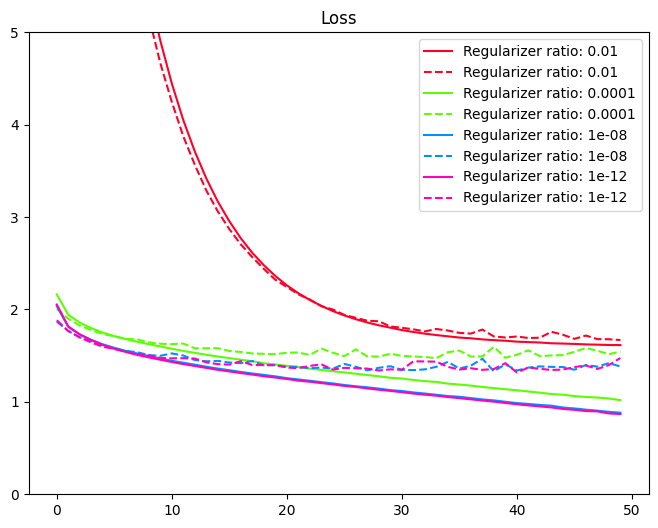

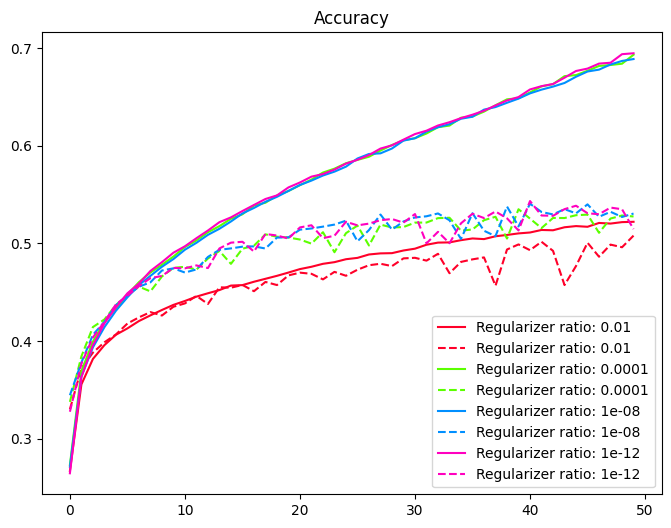

In [ ]:
from matplotlib import cm as mplcm
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [ ]:
results = {}
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = (f"Regularizer ratio: {regulizer_ratio}")
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 3072))
  warnings.warn(msg)


196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.2067 - loss: 300.5658 - val_accuracy: 0.2201 - val_loss: 41.1777
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.1493 - loss: 27.4040 - val_accuracy: 0.1000 - val_loss: 7.3357
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.0992 - loss: 5.3190 - val_accuracy: 0.1000 - val_loss: 2.6526
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.0987 - loss: 2.5285 - val_accuracy: 0.1000 - val_loss: 2.4625
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.1031 - loss: 2.4626 - val_accuracy: 0.1000 - val_loss: 2.4626
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.0976 - loss: 2.4626 - val_accuracy: 0.1000 - val_loss: 2.4626
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.0996 - loss: 2.4626 - val_accuracy: 0.1000 - val_loss: 2.4624
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.0992 - loss: 2.4626 - val_acc

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.2256 - loss: 6.1289 - val_accuracy: 0.3381 - val_loss: 5.7997
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.3607 - loss: 5.7526 - val_accuracy: 0.3831 - val_loss: 5.6413
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.3941 - loss: 5.6030 - val_accuracy: 0.4116 - val_loss: 5.4985
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.4180 - loss: 5.4655 - val_accuracy: 0.4193 - val_loss: 5.3982
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.4327 - loss: 5.3633 - val_accuracy: 0.4407 - val_loss: 5.2870
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.4470 - loss: 5.2579 - val_accuracy: 0.4500 - val_loss: 5.1994
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.4583 - loss: 5.1581 - val_accuracy: 0.4478 - val_loss: 5.1202
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.4655 - loss: 5.0726 - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.2030 - loss: 2.1620 - val_accuracy: 0.3318 - val_loss: 1.8843
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3468 - loss: 1.8509 - val_accuracy: 0.3771 - val_loss: 1.7697
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.3834 - loss: 1.7560 - val_accuracy: 0.4052 - val_loss: 1.7054
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.4114 - loss: 1.6809 - val_accuracy: 0.4151 - val_loss: 1.6601
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.4251 - loss: 1.6390 - val_accuracy: 0.4372 - val_loss: 1.6100
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.4420 - loss: 1.5902 - val_accuracy: 0.4515 - val_loss: 1.5729
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.4571 - loss: 1.5545 - val_accuracy: 0.4467 - val_loss: 1.5660
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.4644 - loss: 1.5238 - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.2143 - loss: 2.1432 - val_accuracy: 0.3510 - val_loss: 1.8594
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3616 - loss: 1.8291 - val_accuracy: 0.3888 - val_loss: 1.7586
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.3907 - loss: 1.7391 - val_accuracy: 0.3950 - val_loss: 1.7076
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.4123 - loss: 1.6832 - val_accuracy: 0.4268 - val_loss: 1.6462
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.4295 - loss: 1.6332 - val_accuracy: 0.4378 - val_loss: 1.6147
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.4432 - loss: 1.5835 - val_accuracy: 0.4372 - val_loss: 1.5821
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.4532 - loss: 1.5615 - val_accuracy: 0.4528 - val_loss: 1.5484
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.4647 - loss: 1.5177 - 

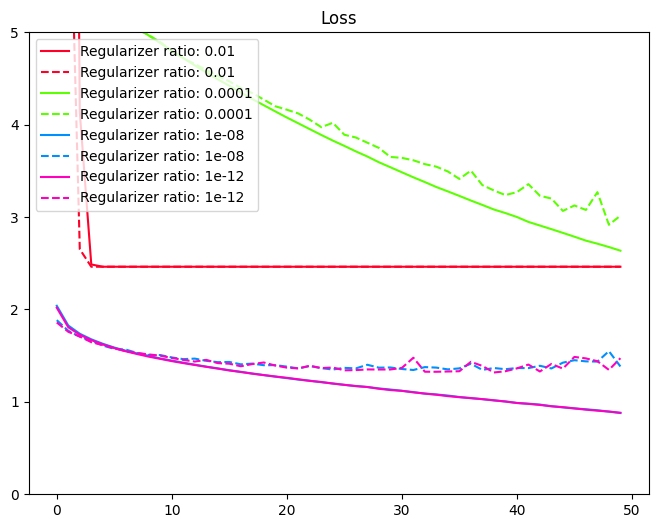

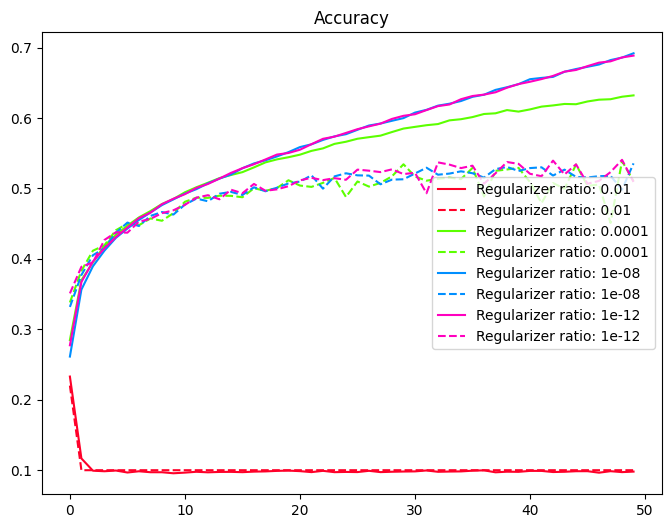

In [ ]:
from matplotlib import cm as mplcm
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:
results = {}
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = (f"Regularizer ratio: {regulizer_ratio}")
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 3072))
  warnings.warn(msg)


196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.2094 - loss: 300.0397 - val_accuracy: 0.2687 - val_loss: 41.1438
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - accuracy: 0.1563 - loss: 27.3870 - val_accuracy: 0.1000 - val_loss: 7.3251
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.0990 - loss: 5.3146 - val_accuracy: 0.1000 - val_loss: 2.6515
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.1001 - loss: 2.5277 - val_accuracy: 0.1000 - val_loss: 2.4626
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.0951 - loss: 2.4626 - val_accuracy: 0.1000 - val_loss: 2.4626
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.0976 - loss: 2.4626 - val_accuracy: 0.1000 - val_loss: 2.4626
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.0994 - loss: 2.4626 - val_accuracy: 0.1000 - val_loss: 2.4626
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.0999 - loss: 2.4626 - val_acc

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.2099 - loss: 6.1462 - val_accuracy: 0.3426 - val_loss: 5.8069
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.3539 - loss: 5.7589 - val_accuracy: 0.3839 - val_loss: 5.6457
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.3870 - loss: 5.6067 - val_accuracy: 0.4102 - val_loss: 5.5145
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.4103 - loss: 5.4833 - val_accuracy: 0.4213 - val_loss: 5.4062
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.4263 - loss: 5.3742 - val_accuracy: 0.4377 - val_loss: 5.3043
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.4402 - loss: 5.2726 - val_accuracy: 0.4373 - val_loss: 5.2234
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.4465 - loss: 5.1866 - val_accuracy: 0.4554 - val_loss: 5.1206
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.4603 - loss: 5.0829 - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.2071 - loss: 2.1569 - val_accuracy: 0.3307 - val_loss: 1.8725
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.3530 - loss: 1.8324 - val_accuracy: 0.3823 - val_loss: 1.7651
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.3916 - loss: 1.7335 - val_accuracy: 0.3966 - val_loss: 1.6932
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.4151 - loss: 1.6713 - val_accuracy: 0.4265 - val_loss: 1.6393
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.4365 - loss: 1.6106 - val_accuracy: 0.4356 - val_loss: 1.5898
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.4526 - loss: 1.5615 - val_accuracy: 0.4474 - val_loss: 1.5617
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.4617 - loss: 1.5361 - val_accuracy: 0.4576 - val_loss: 1.5333
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.4749 - loss: 1.5040 - 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.2078 - loss: 2.1742 - val_accuracy: 0.3417 - val_loss: 1.8662
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.3514 - loss: 1.8399 - val_accuracy: 0.3819 - val_loss: 1.7557
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.3869 - loss: 1.7350 - val_accuracy: 0.4025 - val_loss: 1.6928
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.4120 - loss: 1.6806 - val_accuracy: 0.4230 - val_loss: 1.6458
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.4248 - loss: 1.6369 - val_accuracy: 0.4330 - val_loss: 1.6095
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.4466 - loss: 1.5845 - val_accuracy: 0.4440 - val_loss: 1.5753
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.4592 - loss: 1.5534 - val_accuracy: 0.4517 - val_loss: 1.5484
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.4686 - loss: 1.5236 - 

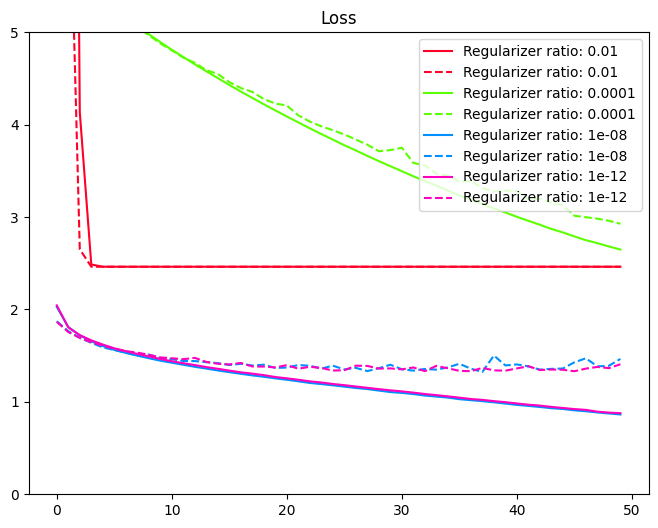

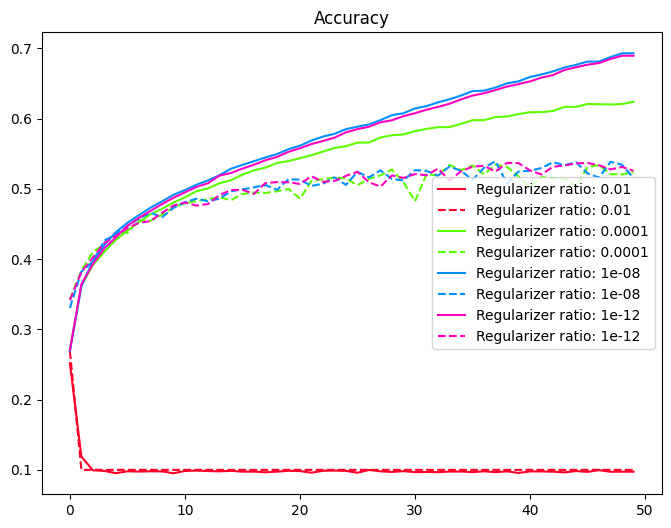

In [26]:
from matplotlib import cm as mplcm
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

NUM_COLORS = 4

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()